In [25]:
import boto3
from sagemaker.analytics import HyperparameterTuningJobAnalytics
from visualization_helpers import visualize_phase
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get Results for all phases

In [26]:
def get_exp_df(job_name, 
               features=None
               ):
    tuning_job_analytics = HyperparameterTuningJobAnalytics(job_name)
    df = tuning_job_analytics.dataframe()
    exclude_columns = [
                       "TrainingJobStatus",
                       "TrainingJobName",
                       "TrainingJobStatus",
                       "TrainingStartTime",
                       "TrainingEndTime"
                       ]
    features = [col for col in df.columns if col not in exclude_columns]
    filtered_df = df.query("TrainingJobStatus=='Completed'").sort_values("FinalObjectiveValue", ascending = False)[features]
    return df, filtered_df

In [27]:
# Initialize the SageMaker client
sagemaker_client = boto3.client('sagemaker')
# Specify the name of your hyperparameter tuning job
job_name_phase1 = 'improved-clip-phase1-241123-1516'
job_name_phase2 = 'improved-clip-phase2-241124-0406'
job_name_phase3 = "improved-clip-phase3-241127-1727"

df_phase1, filtered_df_phase1 = get_exp_df(job_name_phase1)
df_phase2, filtered_df_phase2 = get_exp_df(job_name_phase2)
df_phase3, filtered_df_phase3 = get_exp_df(job_name_phase3)

## Phase 1

Figure saved to ../../report_figures\phase_1\loss_function_vs_optimizer_phase_1_dim_opt.png


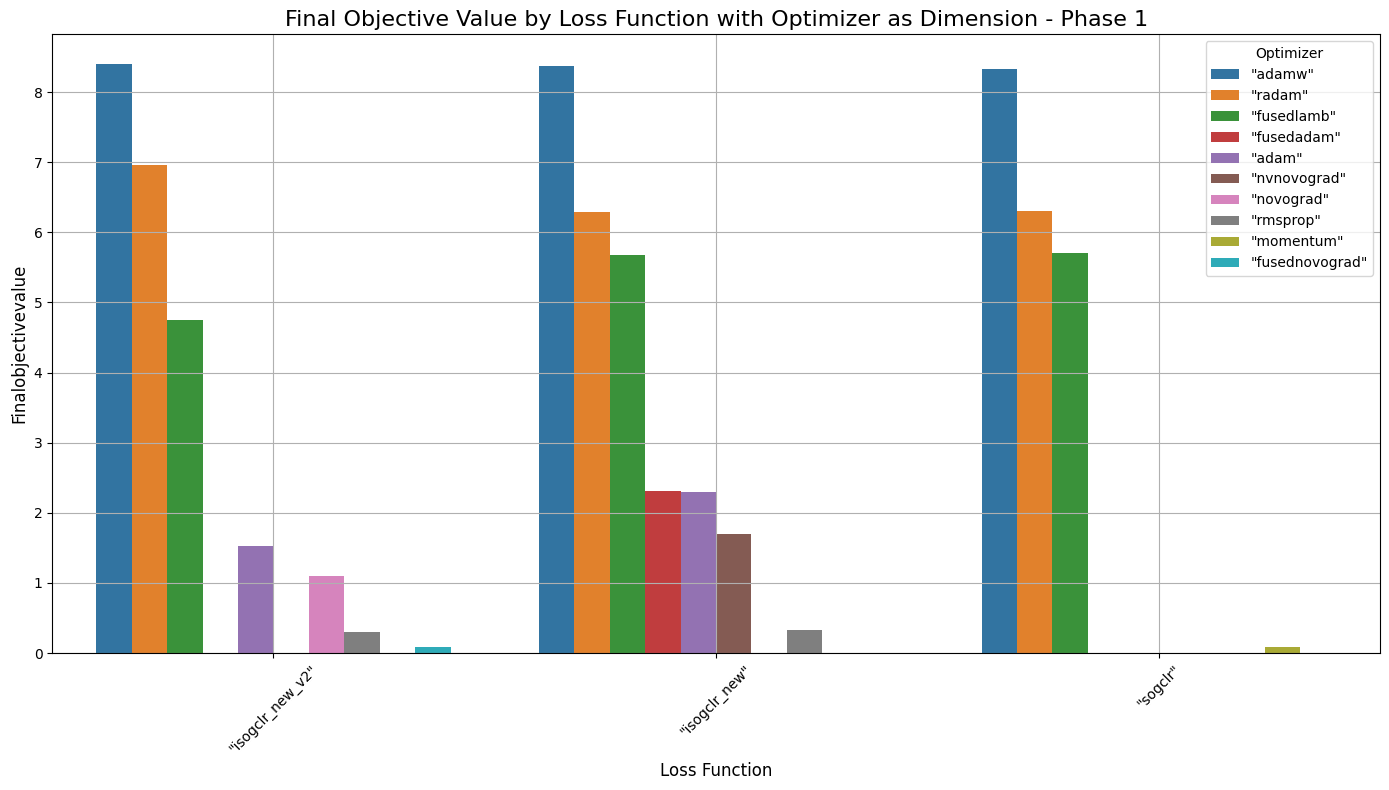

Figure saved to ../../report_figures\phase_1\loss_function_vs_optimizer_phase_1_dim_loss.png


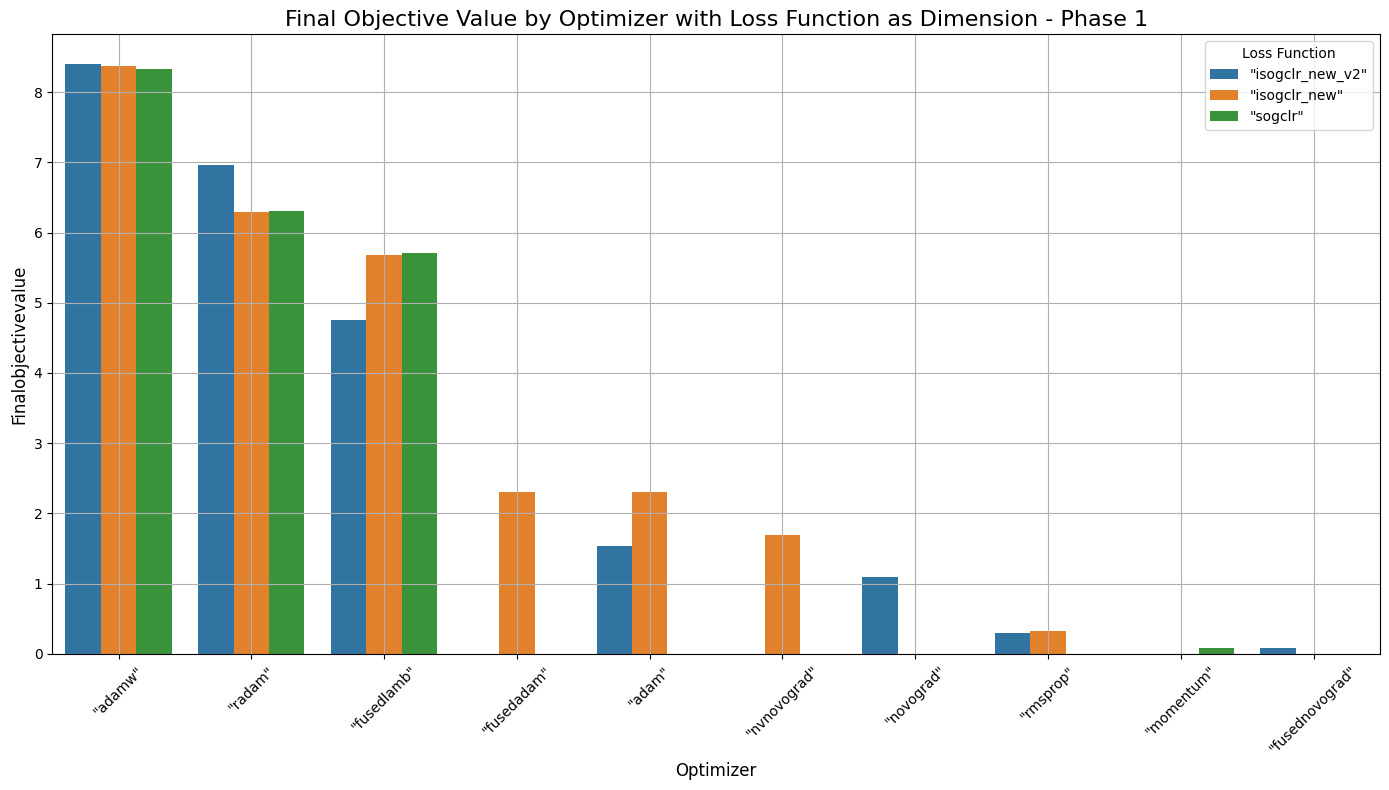

Figure saved to ../../report_figures\phase_1\objective_metric_progress_phase_1.png


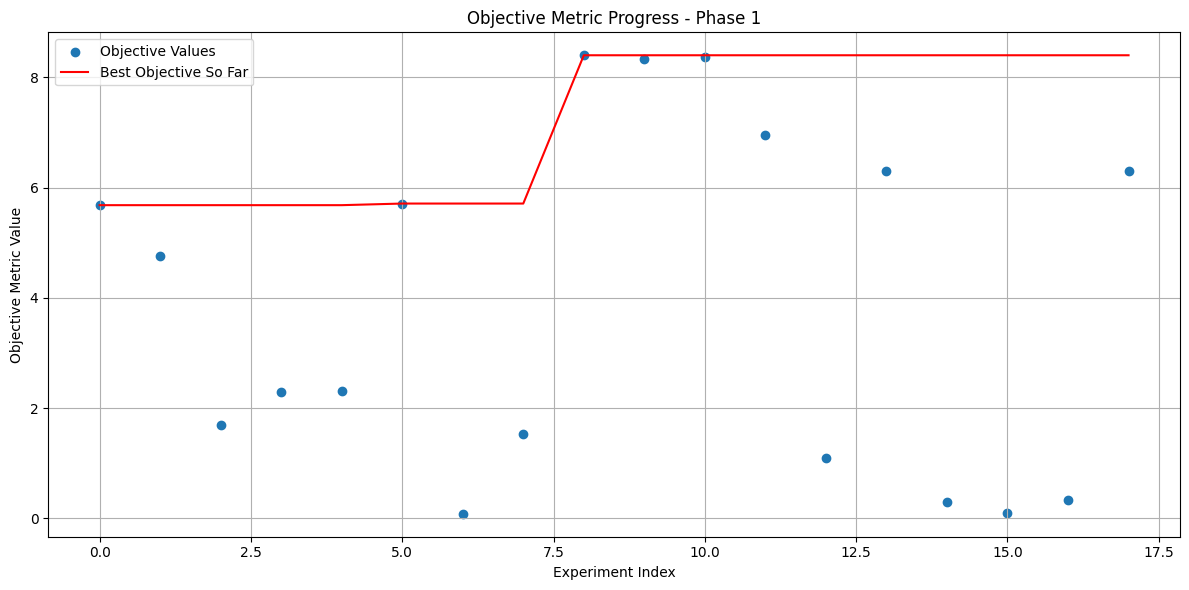

Figure saved to ../../report_figures\phase_1\relative_importance_phase_1.png


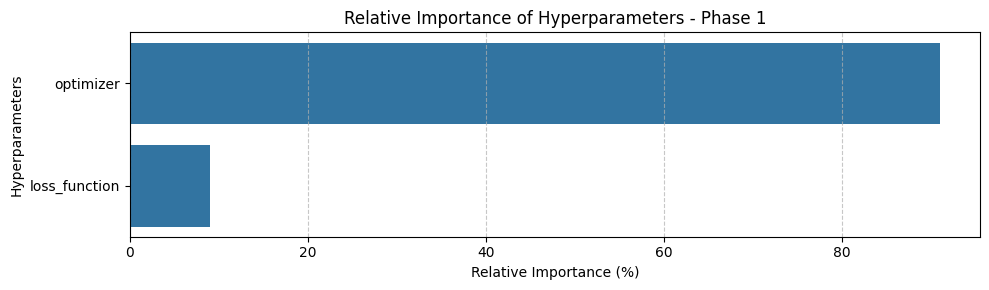

In [28]:
visualize_phase(
    df_phase1, 
    filtered_df_phase1, 
    phase_number=1,
    output_dir = "../../report_figures"
    )

## Phase 2

Figure saved to ../../report_figures\phase_2\loss_function_vs_optimizer_phase_2_dim_opt.png


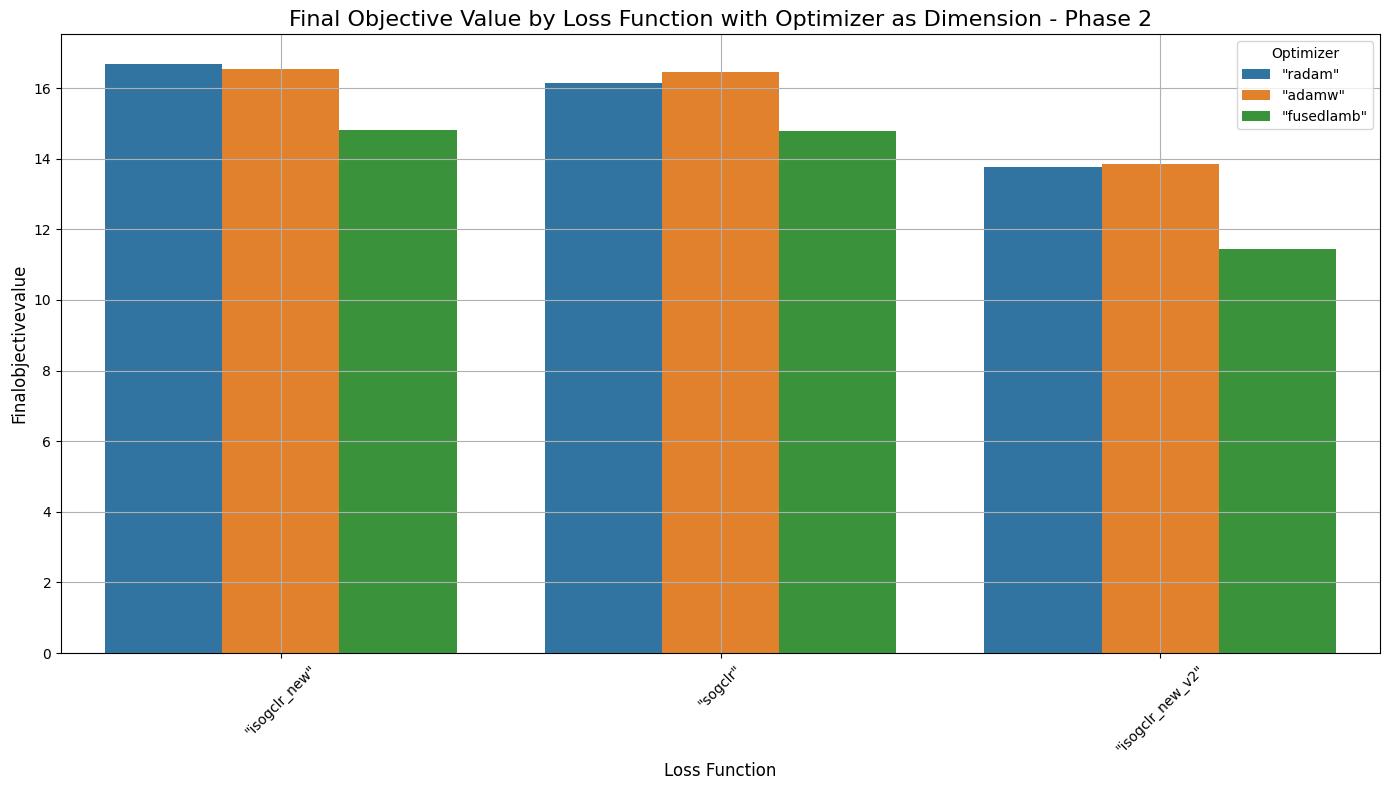

Figure saved to ../../report_figures\phase_2\loss_function_vs_optimizer_phase_2_dim_loss.png


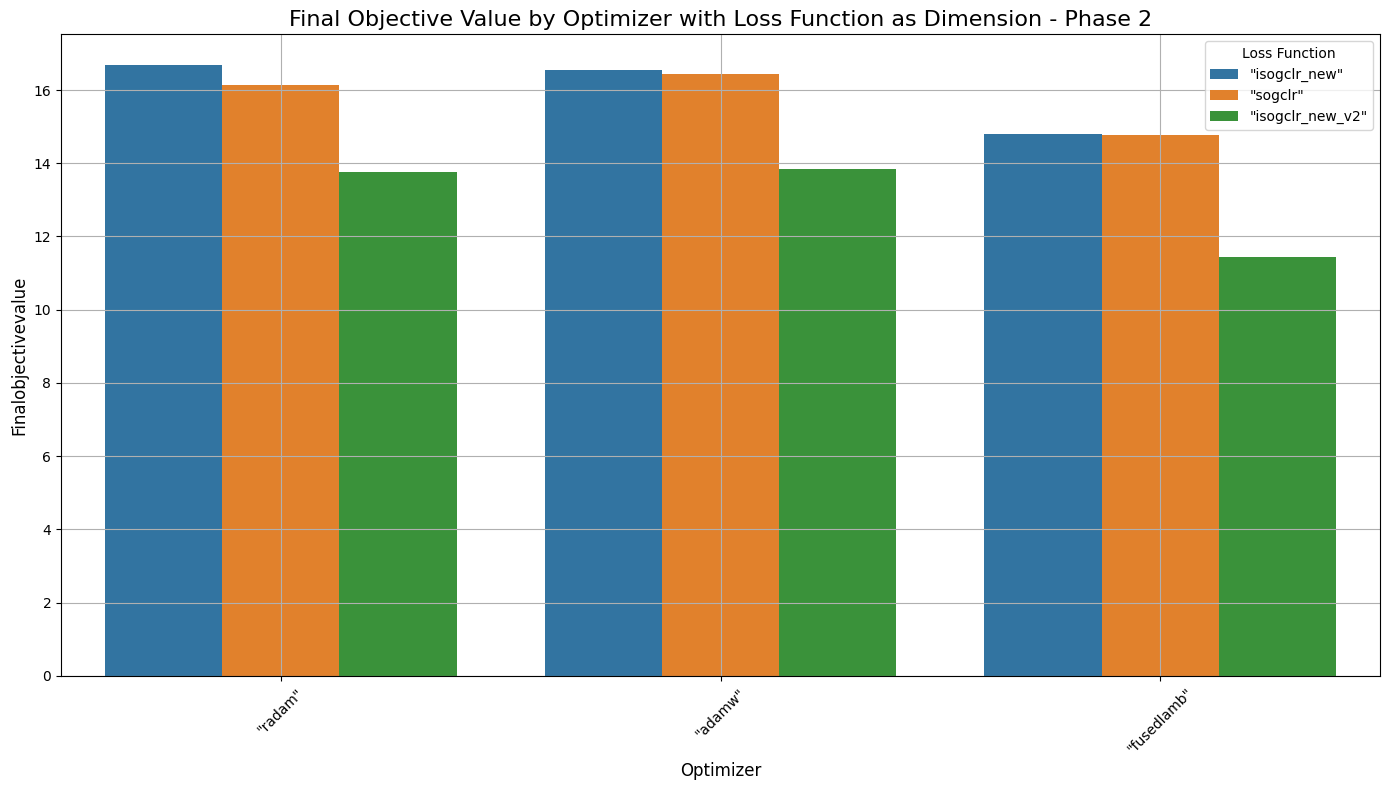

Figure saved to ../../report_figures\phase_2\objective_metric_progress_phase_2.png


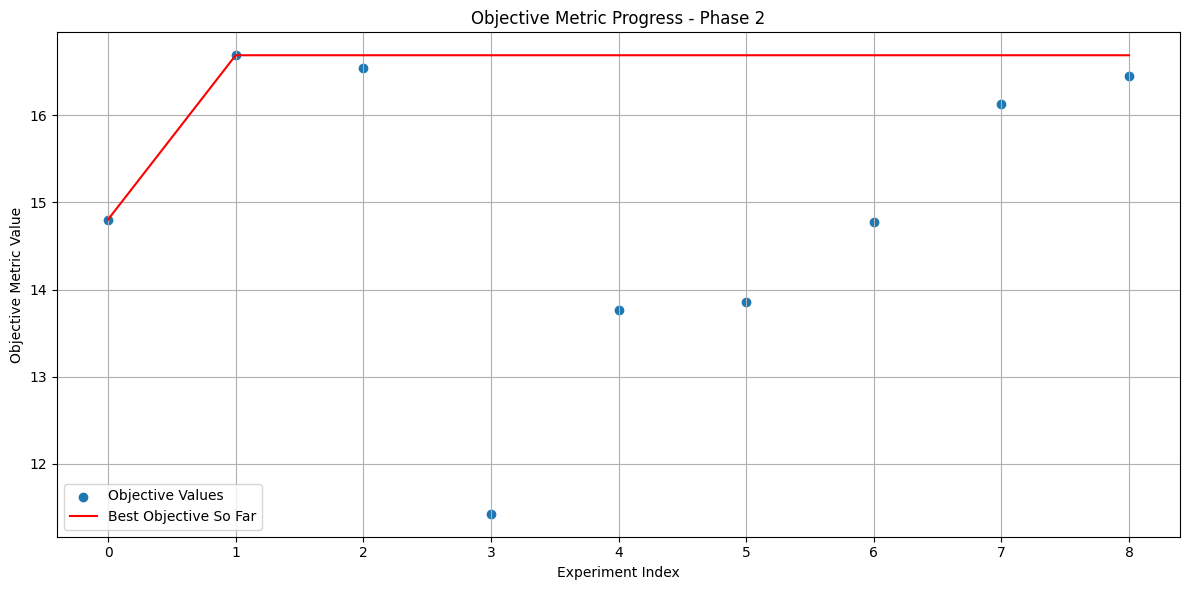

Figure saved to ../../report_figures\phase_2\relative_importance_phase_2.png


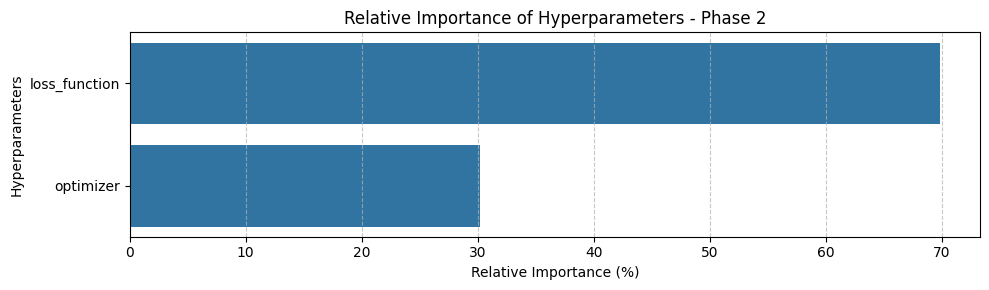

In [29]:
visualize_phase(
    df_phase2, 
    filtered_df_phase2, 
    phase_number=2,
    output_dir = "../../report_figures"
    )

## Phase 3

Figure saved to ../../report_figures\phase_3\objective_metric_progress_phase_3.png


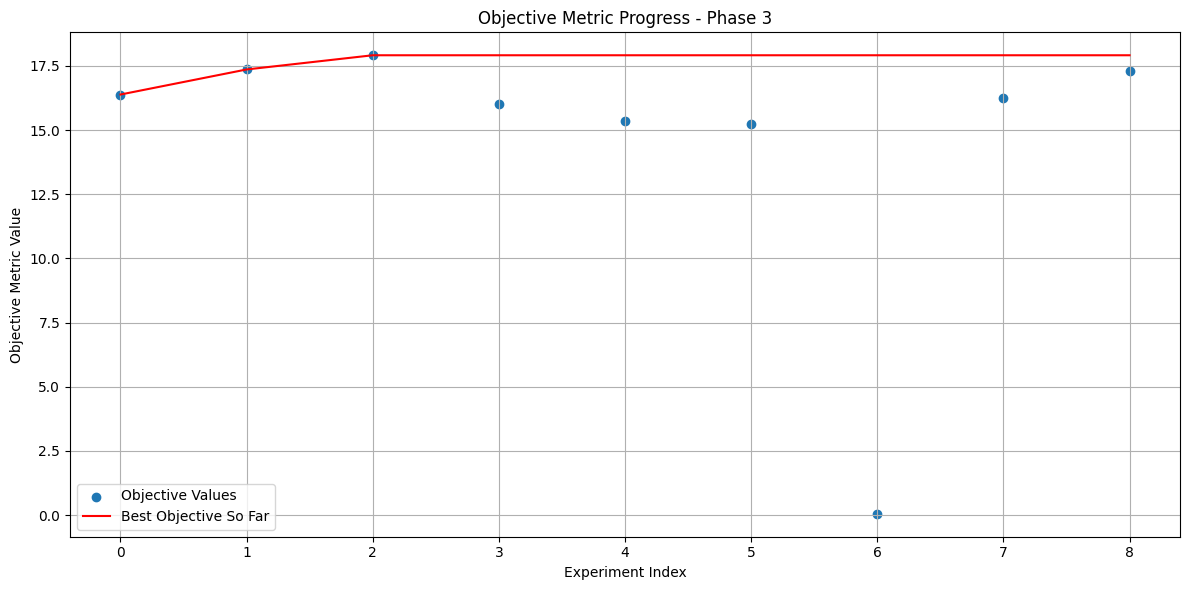

Figure saved to ../../report_figures\phase_3\relative_importance_phase_3.png


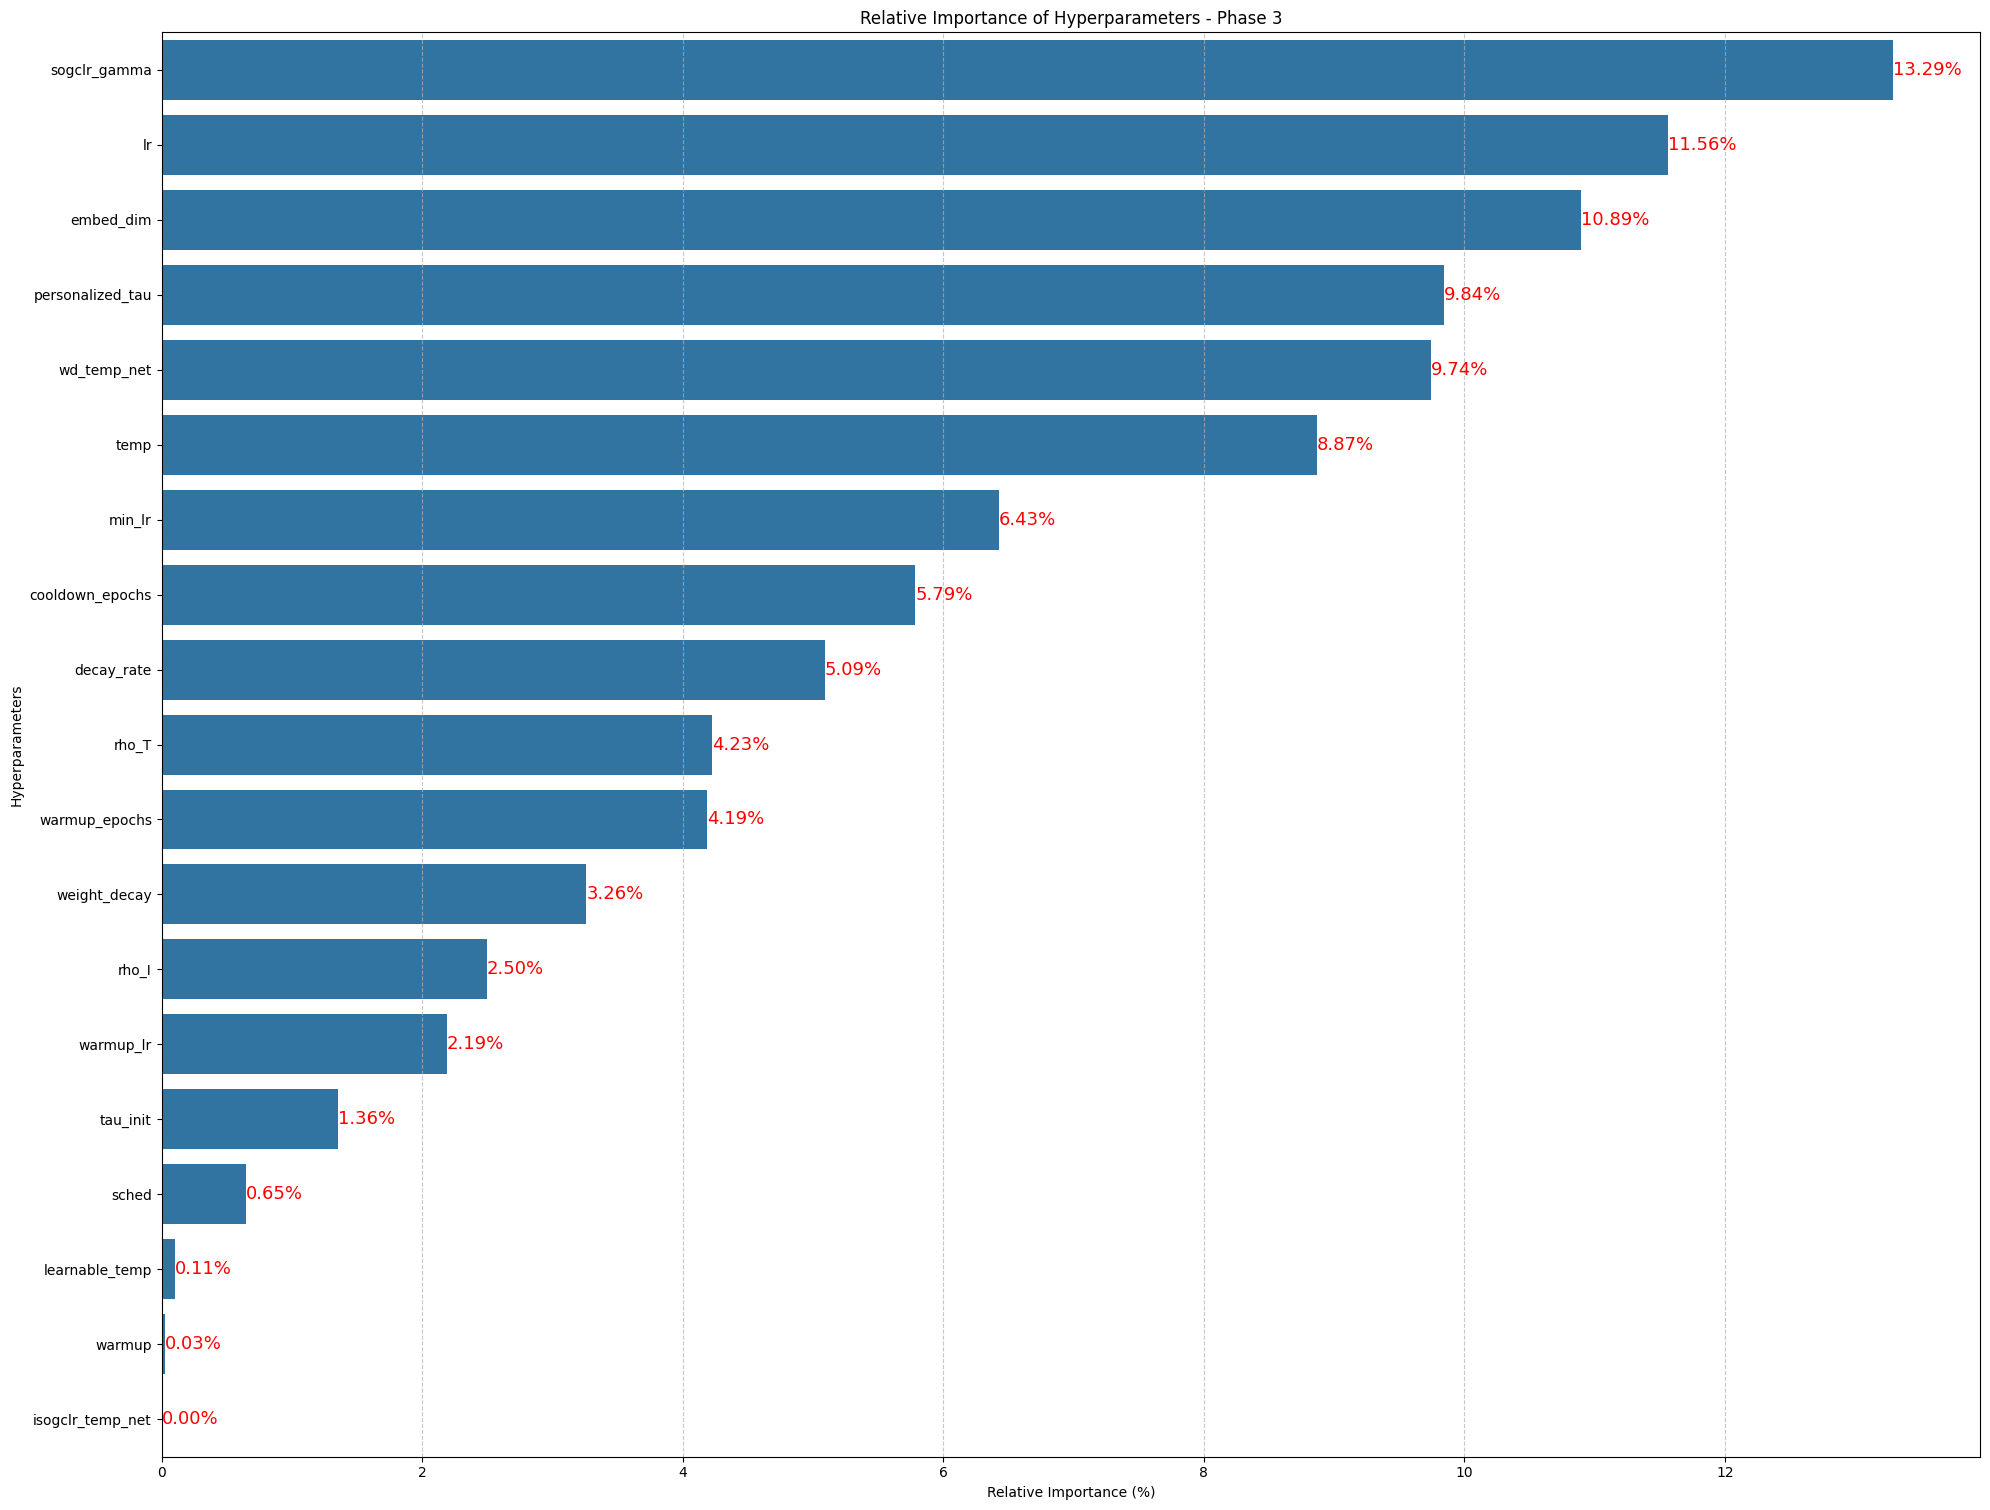

In [41]:
visualize_phase(
    df_phase3, 
    filtered_df_phase3, 
    phase_number=3,
    output_dir = "../../report_figures"
    )